In [ ]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
FOLDERS = {'train': 'train', 'dev': 'dev'}
TOPIC_COLS = ['political', 'racial/ethnic', 'religious', 'gender/sexual', 'other']

def load_data():
    all_data = []

    # Iterate through train and dev folders
    for split_name, folder_path in FOLDERS.items():
        if not os.path.exists(folder_path):
            print(f"Warning: Folder '{folder_path}' not found. Skipping.")
            continue

        files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

        for file in files:
            # Extract language code (e.g., 'amh' from 'amh.csv')
            lang_code = file.split('.')[0]
            file_path = os.path.join(folder_path, file)

            try:
                # Load CSV
                df = pd.read_csv(file_path)

                # Add Metadata
                df['lang'] = lang_code
                df['split'] = split_name

                # Standardize columns (ensure lowercase)
                df.columns = [c.lower() for c in df.columns]

                all_data.append(df)
            except Exception as e:
                print(f"Error loading {file}: {e}")

    # Merge into Master DataFrame
    master_df = pd.concat(all_data, ignore_index=True)

    # --- FEATURE ENGINEERING ---
    # Create binary 'polarized' column: 1 if ANY topic is 1, else 0
    master_df['polarized'] = master_df[TOPIC_COLS].max(axis=1)

    return master_df

def run_eda(df):
    print(f"Total Data Points: {len(df)}")
    print(f"Languages Found: {df['lang'].nunique()}")

    # 1. Class Balance (Polarized vs Neutral)
    print("\n--- Polarization Balance ---")
    print(df['polarized'].value_counts(normalize=True))

    # 2. Visualization: Counts per Language
    plt.figure(figsize=(15, 5))
    sns.countplot(data=df.sort_values('lang'), x='lang', hue='split')
    plt.title("Data Distribution per Language (Train vs Dev)")
    plt.xticks(rotation=45)
    plt.show()

    # 3. Visualization: Topic Heatmap
    # Calculate % of each topic per language
    topic_dist = df.groupby('lang')[TOPIC_COLS].mean()

    plt.figure(figsize=(12, 8))
    sns.heatmap(topic_dist, annot=True, cmap='Reds', fmt='.2f')
    plt.title("Topic Intensity per Language (Percentage of samples)")
    plt.show()

    return df

# --- EXECUTE ---
# df = load_data()
# run_eda(df)
# df.to_csv("master_dataset.csv", index=False)

In [ ]:
# Call the function you defined to actually load the data
master_df = load_data()

Total Data Points: 77368
Languages Found: 22

--- Polarization Balance ---
polarized
1.0    0.531277
0.0    0.468723
Name: proportion, dtype: float64


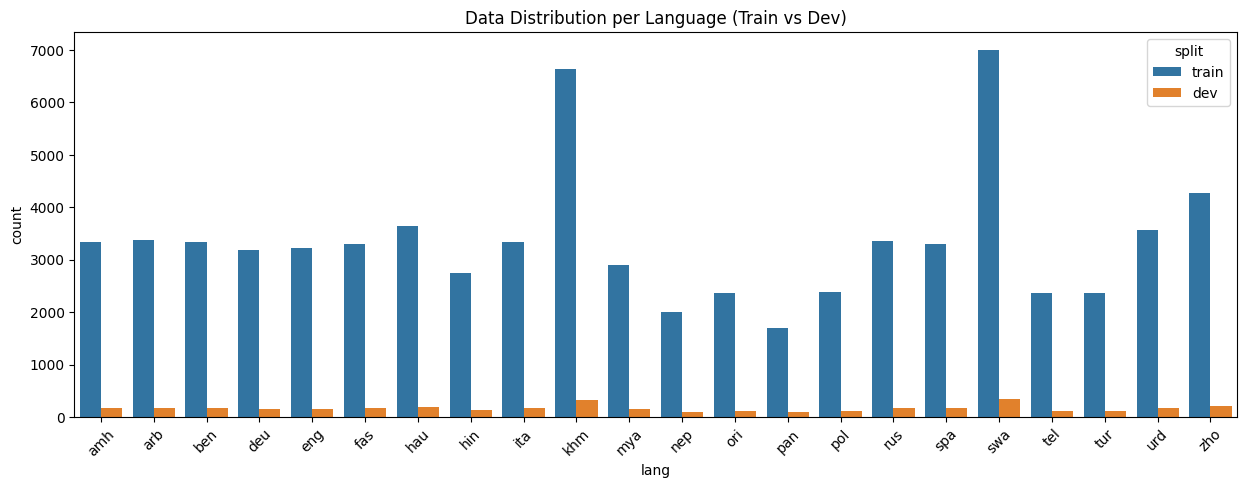

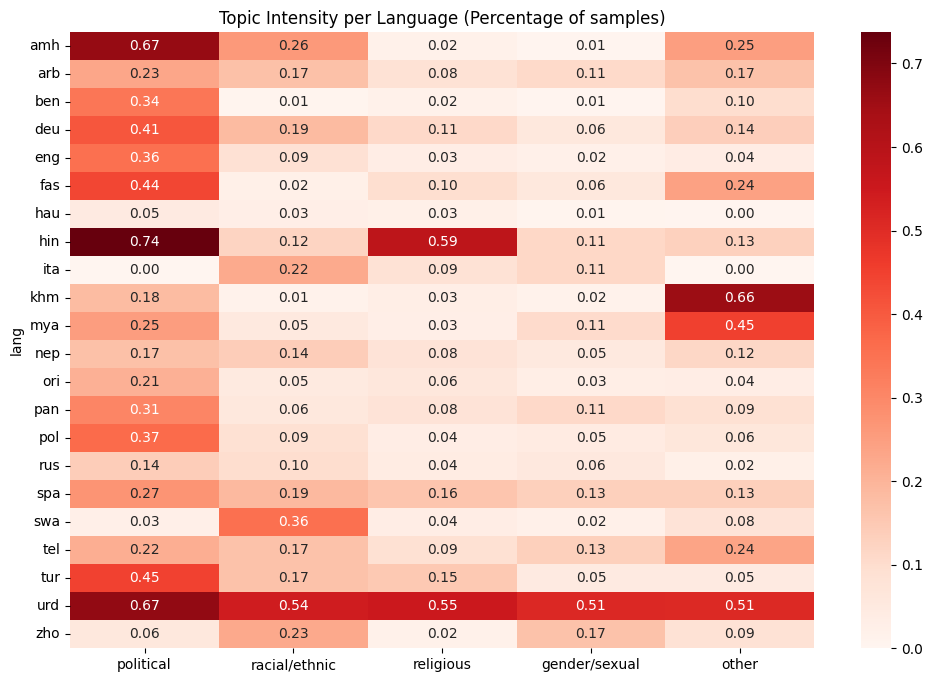

,id,text,political,racial/ethnic,religious,gender/sexual,other,lang,split,polarized
0,spa_bc7bf0a1b710cd724cf96b5eeb020bff,"""bueno, tirando""\ny si hay repregunta, entonce...",0.0,0.0,0.0,0.0,0.0,spa,train,0.0
1,spa_688aec0f6abf4e0be44ecbfa886251cc,"""caimos en su retorica de indigena""",0.0,0.0,0.0,0.0,0.0,spa,train,0.0
2,spa_47019efabe7295c630bcc04bd0429230,"""cara de indigena sudaca"", porque pio asi luego?",0.0,0.0,0.0,0.0,0.0,spa,train,0.0
3,spa_8b4b244dbb90e0a813661ed12a1af5af,"""violar a una nina es menos grave que un abort...",0.0,0.0,0.0,0.0,1.0,spa,train,1.0
4,spa_e2f37881da08b8d7b6eb07bc37356746,"""yo decido quien es judio y quien no""",0.0,1.0,0.0,0.0,0.0,spa,train,1.0
...,...,...,...,...,...,...,...,...,...,...
77363,ori_86b89fa1d0e3957670b5e6872cb135db,କେନ୍ଦ୍ରମନ୍ତ୍ରୀ ଧର୍ମେନ୍ଦ୍ର ପ୍ରଧାନ ବଲାଙ୍ଗୀର ବନ୍ୟ...,NaN,NaN,NaN,NaN,NaN,ori,dev,NaN
77364,ori_a47c801248a9fc67715b6cc91cc19bef,"ସର୍ଭେରୁ ଜଣାପଡ଼ିଛି ଯେ ୬୫ % ଶିଖ୍ , ବୌଦ୍ଧଧର୍ମାବଲମ...",NaN,NaN,NaN,NaN,NaN,ori,dev,NaN
77365,ori_30f1a298e6cfc601a0e293b3e79a7b2f,ଜିଲ୍ଲାରେ ୫ ଗୋଟି ବିଧାନସଭା କ୍ଷେତ୍ରରେ ଦଳୀୟ ପ୍ରାର୍...,NaN,NaN,NaN,NaN,NaN,ori,dev,NaN
77366,ori_afcd14829f7168442c76f6df3cf38b23,ଗ୍ରାମବାସୀଙ୍କ ଦ୍ୱାରା ବାରମ୍ବାର ଅଭିଯୋଗ ହେଉଥିଲେ ସୁ...,NaN,NaN,NaN,NaN,NaN,ori,dev,NaN


In [ ]:
run_eda(master_df)

In [ ]:
master_df.to_csv("master_dataset.csv", index=False)

In [ ]:
# =========================
# SemEval Task 9 (CS445) — HIGH-QUALITY Augmentation Script (v2)
# Generates counterfactual training pairs that match the task definition:
#  - Polarized (1): clear attitude polarization (us-vs-them, hostility, exclusion, vilification)
#  - Non-polarized (0): neutral, factual rewrite of the same event/topic, no group hostility
#
# Output: original master_df + synthetic rows saved to Google Drive as CSV.
# Includes TEST_MODE: samples 2 polarized seeds per language and prints results.
# =========================

import os
import re
import json
import time
import random
import hashlib
import pandas as pd
from tqdm import tqdm
from typing import Dict, Any, List, Optional, Tuple
from concurrent.futures import ThreadPoolExecutor, as_completed

from openai import OpenAI
from google.colab import drive


# =========================
# 1) CONFIG
# =========================

# --- Drive ---
drive.mount("/content/drive")

# INPUT: your original master dataset produced from train/dev language files
INPUT_FILE = "master_dataset.csv"  # upload to Colab or adjust path

# OUTPUT: saved to drive
OUTPUT_FILE = "/content/drive/MyDrive/teacher_training_data_aug_v2.csv"
FAIL_LOG_FILE = "/content/drive/MyDrive/teacher_training_data_aug_v2_failures.jsonl"

# --- OpenAI ---
API_KEY = "Hidden"     # keep hidden in your notebook
MODEL = "gpt-4o-mini"  # fast + reliable JSON mode

# --- Augmentation plan ---
TEST_MODE = False
TEST_SAMPLES_PER_LANG = 2

# Choose whether to include Arabic for extra script diversity
INCLUDE_ARABIC = True  # set False if you want only the original 6

BASE_TARGET_LANGS = ["eng", "spa", "deu", "rus", "tur", "pol"]
if INCLUDE_ARABIC:
    TARGET_LANGS = BASE_TARGET_LANGS + ["arb"]
else:
    TARGET_LANGS = BASE_TARGET_LANGS

LANG_MAP = {
    "eng": "English",
    "spa": "Spanish",
    "deu": "German",
    "rus": "Russian",
    "tur": "Turkish",
    "pol": "Polish",
    "arb": "Arabic",
}

# How many outputs per seed polarized sentence
# Recommended: 2 polarized paraphrases + 2 neutral rewrites = 4 total
N_POL = 2
N_NEU = 2

# Concurrency: keep modest to avoid rate limits
MAX_WORKERS = 8  # 6–10 is usually fine; reduce if you see rate limiting

# Retry policy
MAX_ATTEMPTS = 4
BASE_BACKOFF_SEC = 1.5
JITTER_SEC = 0.5

# Columns in your master dataset (must exist)
TEXT_COL = "text"
LANG_COL = "lang"
SPLIT_COL = "split"

# Subtask-2 type columns (your master_df already has these)
TYPE_COLS = ["political", "racial/ethnic", "religious", "gender/sexual", "other"]

# Synthetic split name
SYNTH_SPLIT = "train_synth_v2"

# -------------------------
# Simple heuristic group-cue lists for label=1 validation (lightweight)
# (Not perfect, but helps filter out "just angry" sentences.)
# -------------------------
GROUP_CUES = {
    "eng": [
        "they ", "them ", "those people", "these people", "our people", "their people",
        "their kind", "you people", "we ", "us ", "traitors", "parasites", "vermin",
        "kick them", "send them back", "don’t belong", "not belong", "hate",
    ],
    "spa": [
        "ellos ", "ellas ", "esa gente", "esa basura", "los nuestros", "los de ellos",
        "su gente", "su calaña", "nosotros", "ellos", "expuls", "no pertenecen",
    ],
    "deu": [
        "die da", "diese leute", "solche leute", "wir ", "uns ", "sie ", "denen ",
        "ihre art", "gehören nicht", "raus mit", "abschieben",
    ],
    "rus": [
        "они ", "их ", "эти люди", "такие люди", "мы ", "нас ", "вам ",
        "не место", "выгнать", "изгнать", "ненавиж",
    ],
    "tur": [
        "onlar ", "bunlar ", "şu insanlar", "biz ", "bize ", "siz ",
        "defol", "kov", "ülkeden", "buraya ait değil",
    ],
    "pol": [
        "oni ", "ich ", "ci ludzie", "tacy ludzie", "my ", "nas ",
        "wynocha", "precz", "nie należą", "wyrzucić",
    ],
    "arb": [
        "هم", "هؤلاء", "تلك", "نحن", "أنتم", "لا مكان لهم", "اطردو", "اخرجو",
        "لا ينتمون", "كراهية",
    ],
}

def contains_group_cue(text: str, lang: str) -> bool:
    t = text.lower()
    cues = GROUP_CUES.get(lang, [])
    return any(cue in t for cue in cues)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# =========================
# 2) PROMPTS (tight, definition-aligned)
# =========================

SYSTEM_PROMPT = """You are an expert sociolinguist and dataset curator for a shared task on online attitude polarization.
You must follow the task definition strictly.

Polarization (label=1) means: sharp division into opposing groups with hostility/exclusion ("us vs them"), stereotyping,
vilification, dehumanization, intolerance, or calls for exclusion/punishment of an out-group. It must clearly reflect
attitude polarization, not mere negativity.

Non-polarized (label=0) means: neutral, factual, calm wording about the same event/topic without group hostility,
stereotyping, exclusion, or "us vs them". Do NOT attribute the polarized opinion to someone else; write neutrally.

You will be given one polarized seed sentence and its polarization TYPE vector (political / racial-ethnic / religious /
gender-sexual / other). All generated variants must remain in the SAME LANGUAGE as the seed and must remain in the SAME TYPE.

Output MUST be valid JSON only, matching the schema requested."""

USER_TEMPLATE = """
Seed language: {language_name}
Seed language code: {lang_code}

Seed sentence (POLARIZED=1):
\"\"\"{seed_text}\"\"\"

Seed polarization TYPE vector (must be preserved for ALL outputs):
{type_vector}

Generate EXACTLY {n_total} items in the SAME LANGUAGE ({language_name}).
Items must be about the SAME underlying topic/event as the seed (do NOT switch to unrelated domains).
Preserve the same polarization TYPE as the seed.

You must produce:
- {n_pol} polarized paraphrases (label=1)
- {n_neu} neutral rewrites (label=0)

Rules for polarized (label=1):
- Must clearly show attitude polarization: explicit group division ("us vs them"), hostility/exclusion/intolerance.
- Not just "this is bad" — must involve groups, group blame, stereotyping, or exclusion/punishment.
- Do not add slurs. Keep it realistic and similar severity to the seed.

Rules for neutral (label=0):
- Factual/calm description of the same topic/event.
- No "us vs them", no stereotyping, no hostility.
- Do not say "someone said" or quote an opinion. Just neutral content.

Return JSON in this exact format:
{{
  "variations": [
    {{
      "text": "...",
      "label": 1,
      "augmentation_type": "pol_paraphrase"
    }},
    ...
  ]
}}
"""


In [ ]:
# =========================
# 3) UTILITIES
# =========================

def stable_source_id(lang: str, text: str) -> str:
    # Stable hash for provenance even if no explicit id column exists
    h = hashlib.sha256((lang + "||" + text).encode("utf-8")).hexdigest()
    return h[:16]

def safe_int(x) -> int:
    try:
        return int(x)
    except:
        return 0

def ensure_type_cols(df: pd.DataFrame) -> None:
    missing = [c for c in TYPE_COLS if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required type columns in master_df: {missing}")

def row_type_vector(row: pd.Series) -> Dict[str, int]:
    return {c: safe_int(row[c]) for c in TYPE_COLS}

def is_polarized_seed(row: pd.Series) -> bool:
    # Seed must be polarized==1 and at least one type column == 1
    if safe_int(row.get("polarized", 0)) != 1:
        return False
    tv = row_type_vector(row)
    return max(tv.values()) == 1

# Languages where explicit group cues are usually lexicalized
CUE_ENFORCED_LANGS = {"eng", "spa", "deu", "pol"}

# Languages where explicit group cues are usually lexicalized (soft check)
CUE_ENFORCED_LANGS = {"eng", "spa", "deu", "pol"}

def validate_variations(
    lang_code: str,
    variations: list,
    expected_total: int,
    n_pol: int,
    n_neu: int,
    seed_text: str
):
    # --- Structural validation ---
    if not isinstance(variations, list):
        return False, "Variations is not a list"

    if len(variations) != expected_total:
        return False, f"Expected {expected_total} items, got {len(variations)}"

    labels = []
    for i, item in enumerate(variations):
        if not isinstance(item, dict):
            return False, f"Item {i} is not a dict"

        if not all(k in item for k in ("text", "label", "augmentation_type")):
            return False, f"Item {i} missing required keys"

        if not isinstance(item["text"], str) or len(item["text"].strip()) < 5:
            return False, f"Item {i} has empty or invalid text"

        if item["label"] not in [0, 1, 0.0, 1.0]:
            return False, f"Item {i} has invalid label: {item['label']}"

        labels.append(int(item["label"]))

    # --- Label balance check ---
    if labels.count(1) != n_pol or labels.count(0) != n_neu:
        return (
            False,
            f"Label imbalance: expected {n_pol} polarized / {n_neu} neutral, "
            f"got {labels.count(1)} / {labels.count(0)}"
        )

    # --- Neutral marker check (robust for all languages) ---
    # Neutral rewrites should not invent new @mentions, #hashtags, or URLs.
    seed_markers = {m.lower() for m in extract_markers(seed_text)}
    seed_markers = {m for m in seed_markers if m != "@user"}  # ignore placeholder

    neutral_texts = [it["text"] for it in variations if int(it["label"]) == 0]
    for nt in neutral_texts:
        nt_markers = {m.lower() for m in extract_markers(nt)}
        nt_markers = {m for m in nt_markers if m != "@user"}  # ignore placeholder

        new_markers = nt_markers - seed_markers
        if len(new_markers) > 0:
            return False, f"Neutral introduced new markers: {sorted(list(new_markers))[:5]}"

    # --- Group-cue validation (language-aware, soft) ---
    # Only require that AT LEAST ONE polarized variant contains a group-framing cue
    # for languages where these cues are commonly explicit.
    if lang_code in CUE_ENFORCED_LANGS:
        polarized_texts = [it["text"] for it in variations if int(it["label"]) == 1]
        if not any(contains_group_cue(text, lang_code) for text in polarized_texts):
            return False, f"No explicit group cue detected in polarized outputs for '{lang_code}'"

    return True, "ok"

def call_openai_json(
    client: OpenAI,
    lang_code: str,
    seed_text: str,
    type_vector: Dict[str, int],
    n_pol: int,
    n_neu: int,
    attempt: int = 1,
    stricter: bool = False
) -> Dict[str, Any]:
    language_name = LANG_MAP.get(lang_code, "English")
    n_total = n_pol + n_neu

    # Make retries stricter if needed
    extra = ""
    if stricter:
        extra = "\nEXTRA STRICT: For label=1, you MUST include explicit group division words (e.g., 'they/them/we/us' equivalents) and clear hostility/exclusion.\n"

    user_prompt = USER_TEMPLATE.format(
        language_name=language_name,
        lang_code=lang_code,
        seed_text=seed_text,
        type_vector=json.dumps(type_vector, ensure_ascii=False),
        n_total=n_total,
        n_pol=n_pol,
        n_neu=n_neu
    ) + extra

    resp = client.chat.completions.create(
        model=MODEL,
        messages=[
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": user_prompt},
        ],
        response_format={"type": "json_object"},
        temperature=0.7
    )
    return json.loads(resp.choices[0].message.content)


def generate_for_seed(
    client: OpenAI,
    row: pd.Series,
    n_pol: int,
    n_neu: int
) -> Tuple[List[Dict[str, Any]], Optional[Dict[str, Any]]]:
    """
    Returns (synthetic_rows, failure_log_or_none)
    """
    lang_code = row[LANG_COL]
    seed_text = str(row[TEXT_COL])
    tv = row_type_vector(row)
    src_id = stable_source_id(lang_code, seed_text)

    expected_total = n_pol + n_neu

    for attempt in range(1, MAX_ATTEMPTS + 1):
        try:
            data = call_openai_json(
            client=client,
            lang_code=lang_code,
            seed_text=seed_text,
            type_vector=tv,
            n_pol=n_pol,
            n_neu=n_neu,
            attempt=attempt,
            stricter=(attempt >= 2)
        )
            variations = data.get("variations", None)

            ok, reason = validate_variations(lang_code, variations, expected_total, n_pol, n_neu, seed_text)
            if not ok:
                # retry with stricter instruction
                backoff = BASE_BACKOFF_SEC * (2 ** (attempt - 1)) + random.random() * JITTER_SEC
                time.sleep(backoff)
                continue

            # Build rows
            out = []
            for it in variations:
                label = int(it["label"])
                aug_type = normalize_aug_type(str(it["augmentation_type"]))

                new_row = {
                    TEXT_COL: it["text"].strip(),
                    "polarized": label,
                    LANG_COL: lang_code,
                    SPLIT_COL: SYNTH_SPLIT,
                    "is_synthetic": 1,
                    "augmentation_type": aug_type,
                    "source_row_id": src_id,

                    # NEW: keep seed visible for inspection
                    "seed_text": seed_text,
                    "seed_lang": lang_code,
                }

                # Preserve Subtask-2 type vector from seed
                for c in TYPE_COLS:
                    new_row[c] = int(tv[c])

                out.append(new_row)

            return out, None

        except Exception as e:
            backoff = BASE_BACKOFF_SEC * (2 ** (attempt - 1)) + random.random() * JITTER_SEC
            time.sleep(backoff)
            last_err = str(e)

    # Failure log
    fail = {
        "lang": lang_code,
        "seed_text": seed_text[:500],
        "source_row_id": src_id,
        "type_vector": tv,
        "error": last_err if "last_err" in locals() else "unknown_error",
    }
    return [], fail

import re

# Only robust "markers" (works for all languages, doesn't break German capitalization)
MARKER_PATTERNS = [
    r'@\w+',                 # mentions
    r'#\w+',                 # hashtags
    r'https?://\S+',         # URLs
    r'www\.\S+',             # URLs
]

def extract_markers(text: str) -> set:
    markers = set()
    for pat in MARKER_PATTERNS:
        markers.update(re.findall(pat, text))
    return markers

def normalize_aug_type(t: str) -> str:
    t = (t or "").strip().lower()
    if "neutral" in t:
        return "neutral_rewrite"
    if "paraphrase" in t or "polar" in t:
        return "pol_paraphrase"
    return "unknown"



In [ ]:
# =========================
# 4) MAIN PIPELINE
# =========================

def main():
    # Init client
    client = OpenAI(api_key=API_KEY)

    # Load master dataset
    if not os.path.exists(INPUT_FILE):
        raise FileNotFoundError(f"{INPUT_FILE} not found. Upload it to Colab or change INPUT_FILE path.")

    df = pd.read_csv(INPUT_FILE)
    print(f"Loaded master_dataset: {len(df)} rows")

    # Sanity
    for col in [TEXT_COL, LANG_COL, SPLIT_COL, "polarized"]:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")
    ensure_type_cols(df)

    # Filter train only for seeds to avoid leakage
    train_df = df[df[SPLIT_COL] == "train"].copy()
    print(f"Train rows (seed pool): {len(train_df)}")

    # Select only target languages + polarized seeds
    seed_df = train_df[train_df[LANG_COL].isin(TARGET_LANGS)].copy()
    seed_df = seed_df[seed_df.apply(is_polarized_seed, axis=1)].copy()

    print(f"Target languages: {TARGET_LANGS}")
    print(f"Polarized seed rows found: {len(seed_df)}")
    print(f"Planned outputs per seed: {N_POL + N_NEU}  ({N_POL} polarized + {N_NEU} neutral)")
    print(f"Estimated synthetic rows: {len(seed_df) * (N_POL + N_NEU)}")

    # TEST MODE sampling
    if TEST_MODE:
        print(f"\n[TEST_MODE=True] Sampling {TEST_SAMPLES_PER_LANG} polarized seeds per language...\n")
        sampled = []
        for lang in TARGET_LANGS:
            sub = seed_df[seed_df[LANG_COL] == lang]
            if len(sub) == 0:
                print(f"WARNING: no polarized seeds for {lang}")
                continue
            k = min(TEST_SAMPLES_PER_LANG, len(sub))
            sampled.append(sub.sample(k, random_state=42))
        seed_df = pd.concat(sampled, ignore_index=True)
        print(f"TEST_MODE seeds: {len(seed_df)}")

    # Augment
    augmented_rows: List[Dict[str, Any]] = []
    failures: List[Dict[str, Any]] = []

    print("\nStarting augmentation...\n")
    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as ex:
        futures = []
        for _, row in seed_df.iterrows():
            futures.append(ex.submit(generate_for_seed, client, row, N_POL, N_NEU))

        for fut in tqdm(as_completed(futures), total=len(futures)):
            rows, fail = fut.result()
            if rows:
                augmented_rows.extend(rows)
            if fail is not None:
                failures.append(fail)

    aug_df = pd.DataFrame(augmented_rows)

    # Optional: drop exact duplicates in synthetic
    if len(aug_df) > 0:
        before = len(aug_df)
        aug_df = aug_df.drop_duplicates(subset=[TEXT_COL, LANG_COL, "polarized"]).reset_index(drop=True)
        after = len(aug_df)
        if after != before:
            print(f"Dropped {before - after} duplicate synthetic rows.")

    # Type-cast to avoid mixed types downstream
    for c in ["polarized", "is_synthetic"]:
        if c in aug_df.columns:
            aug_df[c] = aug_df[c].astype(int)

    for c in TYPE_COLS:
        if c in aug_df.columns:
            aug_df[c] = aug_df[c].astype(int)

    # Save failures log
    if len(failures) > 0:
        with open(FAIL_LOG_FILE, "w", encoding="utf-8") as f:
            for item in failures:
                f.write(json.dumps(item, ensure_ascii=False) + "\n")
        print(f"\nFailures logged to: {FAIL_LOG_FILE} (count={len(failures)})")
    else:
        print("\nNo failures detected.")

    # In TEST_MODE: print samples and stop without saving full merged dataset (optional behavior)
    if TEST_MODE:
        print("\n=== TEST_MODE OUTPUT (2 seeds per language, each with 4 generations) ===\n")
        if len(aug_df) == 0:
            print("No synthetic data generated in test mode (check failure log).")
            return

        for lang in TARGET_LANGS:
            sub = aug_df[aug_df[LANG_COL] == lang]
            if len(sub) == 0:
                continue

            print(f"\n==============================")
            print(f"Language: {lang} ({LANG_MAP.get(lang)})")
            print(f"==============================")

            # Choose up to 2 different seeds
            seed_ids = sub["source_row_id"].dropna().unique().tolist()
            seed_ids = seed_ids[:2]  # take first 2 distinct seeds (already random via sampling)

            for j, sid in enumerate(seed_ids, start=1):
                block = sub[sub["source_row_id"] == sid].copy()

                # Seed text (same for the 4 rows)
                seed_text = block["seed_text"].iloc[0] if "seed_text" in block.columns else "<missing seed_text>"

                print(f"\n--- SEED #{j} ---")
                print(f"ORIGINAL (seed): {seed_text}")

                # Print 4 augmentations in stable order
                order = ["pol_paraphrase", "neutral_rewrite"]
                # If you include suffixes like pol_paraphrase_1, etc., sort by augmentation_type then label
                block = block.sort_values(by=["augmentation_type", "polarized"])

                for _, r in block.iterrows():
                    print(f"[{r['augmentation_type']}] label={r['polarized']}  text={r[TEXT_COL]}")

        print("\n[TEST_MODE] Done. Set TEST_MODE=False to run full augmentation and save.")
        return

    # Merge with original df (keeping dev rows untouched) + synthetic
    if len(aug_df) == 0:
        raise RuntimeError("CRITICAL: Augmentation produced 0 rows. Check API key/model and failure log.")

    # Add is_synthetic column to original for consistency
    df2 = df.copy()
    if "is_synthetic" not in df2.columns:
        df2["is_synthetic"] = 0
    if "augmentation_type" not in df2.columns:
        df2["augmentation_type"] = ""
    if "source_row_id" not in df2.columns:
        df2["source_row_id"] = ""

    # Type-cast original topic cols to int where possible (avoids mixed type warnings)
    for c in ["polarized", "is_synthetic"]:
        if c in df2.columns:
            df2[c] = pd.to_numeric(df2[c], errors="coerce").fillna(0).astype(int)
    for c in TYPE_COLS:
        if c in df2.columns:
            df2[c] = pd.to_numeric(df2[c], errors="coerce").fillna(0).astype(int)

    final_df = pd.concat([df2, aug_df], ignore_index=True)

    # Save
    final_df.to_csv(OUTPUT_FILE, index=False)
    print("\n=== SUCCESS ===")
    print(f"Original rows:  {len(df2)}")
    print(f"Synthetic rows: {len(aug_df)}")
    print(f"Total rows:     {len(final_df)}")
    print(f"Saved to:       {OUTPUT_FILE}")


if __name__ == "__main__":
    main()


Loaded master_dataset: 77368 rows
Train rows (seed pool): 73681
Target languages: ['eng', 'spa', 'deu', 'rus', 'tur', 'pol', 'arb']
Polarized seed rows found: 9040
Planned outputs per seed: 4  (2 polarized + 2 neutral)
Estimated synthetic rows: 36160

Starting augmentation...



100%|██████████| 9040/9040 [16:26:28<00:00,  6.55s/it]


Dropped 7 duplicate synthetic rows.

Failures logged to: /content/drive/MyDrive/teacher_training_data_aug_v2_failures.jsonl (count=2508)

=== SUCCESS ===
Original rows:  77368
Synthetic rows: 26121
Total rows:     103489
Saved to:       /content/drive/MyDrive/teacher_training_data_aug_v2.csv
